## ДЗ №1. Линейная регрессия в PyTorch

### 0. Загрузка и предобработка данных

In [ ]:
import pandas as pd

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df.shape)

(506, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

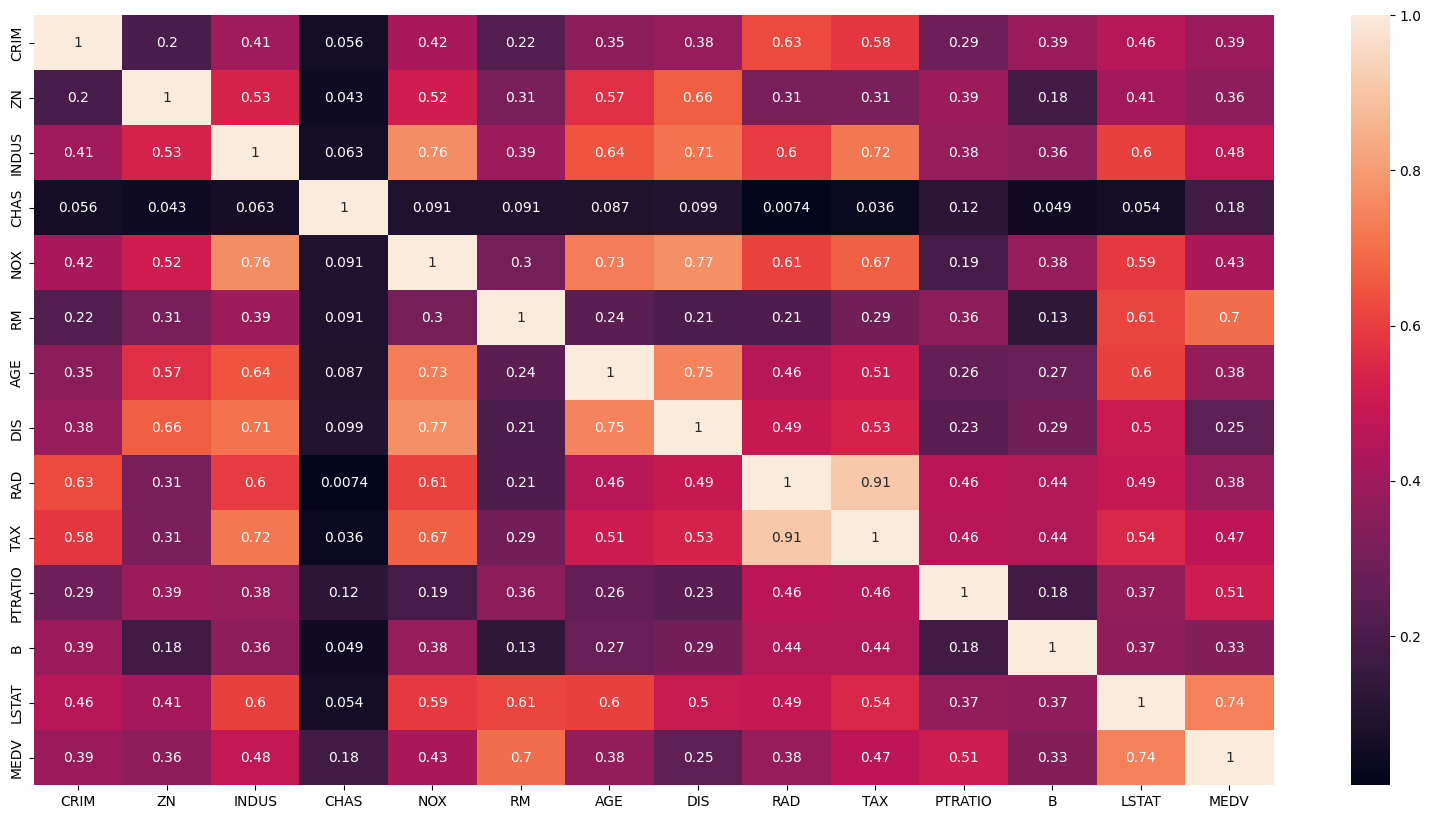

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
# Оставим только параметры, которые имеют высокую (> 0.4) корреляцию с целевой переменной (MEDV)
columns_best = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']
# columns_best = ['LSTAT', 'RM']
X = df.loc[:, columns_best]
Y = df['MEDV']

In [ ]:
# Отнормируем данные (?)
X = X.apply(
    lambda x: (x - x.mean()) / x.std()
)

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 6)
(152, 6)
(354,)
(152,)


In [ ]:
import torch

print(torch.__version__)

2.0.1+cu118


In [ ]:
# Преобразуем наши данные в тензоры PyTorch
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)

### 1. Создаем модель 

In [ ]:
w_num = X_train.shape[1]
net = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1)
)

torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [ ]:
# Задаем итератор по нашим данным
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=8, shuffle=True)

In [ ]:
loss = torch.nn.MSELoss()

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

In [ ]:
# Запускаем обучение
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for x, y in train_iter:
        optimizer.zero_grad()
        output = net(x)
        l = loss(output, y)
        l.backward()
        optimizer.step()
    
    print("epoch {} loss: {:.4f}".format(epoch, l.item()))
    if l.item() < 1.0:
        break

epoch 1 loss: 565.0521
epoch 2 loss: 395.3831
epoch 3 loss: 1340.5753
epoch 4 loss: 244.8473
epoch 5 loss: 91.6359
epoch 6 loss: 165.6973
epoch 7 loss: 129.5944
epoch 8 loss: 57.4824
epoch 9 loss: 68.1046
epoch 10 loss: 41.0695
epoch 11 loss: 29.5127
epoch 12 loss: 16.6802
epoch 13 loss: 15.1235
epoch 14 loss: 2.3842
epoch 15 loss: 19.4677
epoch 16 loss: 12.2071
epoch 17 loss: 2.7918
epoch 18 loss: 10.7631
epoch 19 loss: 39.3158
epoch 20 loss: 0.1636


In [ ]:
# Проверим качество модели на тестовых данных
print(loss(net(X_test), Y_test).item())

26.26350975036621
